<a href="https://colab.research.google.com/github/livjab/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

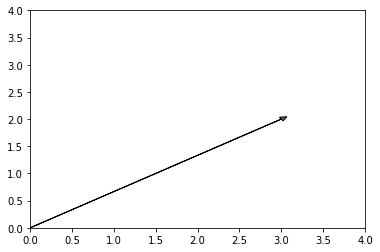

In [6]:
a = [3, 2]

plt.xlim(0, 4)
plt.ylim(0, 4)

plt.arrow(0,0, a[0], a[1], head_width=.08, head_length=0.08);

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [7]:
b = [17, -4, -2, 1]
np.linalg.norm(b)

17.60681686165901

This represents the length of vector b

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

27 - 49 - 8 + 72 = 42

In [8]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]

np.dot(c, d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [24]:
e = [[7, 4, 2], [1, 3, -1], [2, 6, -4]]


e_inv = np.linalg.inv(e)
e_inv

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [26]:
# should equal identity matrix

np.dot(e, e_inv)

array([[ 1.00000000e+00,  4.44089210e-16,  0.00000000e+00],
       [ 3.46944695e-17,  1.00000000e+00,  1.11022302e-16],
       [ 6.93889390e-17, -4.44089210e-16,  1.00000000e+00]])

In [22]:
e_t = np.transpose(e)
e_t

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [28]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [29]:
##### Your Code Here #####
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [31]:
cust_variance = 314.264069**2
snow_variance = 2.927700**2
print(cust_variance)
print(snow_variance)

98761.90506443677
8.57142729


Customers
- mean = 1135.71
- variance = 98761.91
- standard deviation = 314.26

Snow
- mean = 2.71
- variance = 8.57
- standard deviation = 2.93


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
# Not really.
# Standard deviation is better to use for comparison than variance because it 
# is a more managable number and the same units as mean.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [32]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [35]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
##### Your Code Here #####

from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [36]:
df.columns

Index(['Country', 'Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish',
       'Fats_and_Oils', 'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals',
       'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery'],
      dtype='object')

In [37]:
features = ['Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish',
       'Fats_and_Oils', 'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals',
       'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery']
target = ['Country']

X = df.loc[:, features].values
print(X)

[[ 105  245  685  147  193  156  720  253  488  198  360 1102 1472   57
  1374  375   54]
 [ 103  227  803  160  235  175  874  265  570  203  365 1137 1582   73
  1256  475   64]
 [ 103  242  750  122  184  147  566  171  418  220  337  957 1462   53
  1572  458   62]
 [  66  267  586   93  209  139 1033  143  355  187  334  674 1494   47
  1506  135   41]]


In [51]:
# standardize with library
from sklearn import preprocessing

standardized_X = preprocessing.scale(X)
standardized_X

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

In [78]:
# check results
# means should all be zero, stds should all be 1

print(standardized_X.mean(axis=0))

print(standardized_X.std(axis=0))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.93889390e-18 -5.55111512e-17  0.00000000e+00  5.55111512e-17
  0.00000000e+00  0.00000000e+00 -5.55111512e-17  0.00000000e+00
  6.93889390e-18 -5.55111512e-17 -2.77555756e-17  0.00000000e+00
  5.55111512e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [80]:
##### Your Code Here #####

from numpy import array
from sklearn.decomposition import PCA


# create the PCA instance
pca = PCA(2)

# fit on data
pca.fit(X)

# find Eigen things
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)


 Eigenvectors: 
 [[ 0.50672697  0.86210659]
 [ 0.86210659 -0.50672697]]

 Eigenvalues: 
 [36.62769487 15.28042483]


In [81]:
# transform data
B = pca.transform(X)
print("\n Projected Data: \n", B)


 Projected Data: 
 [[-2.7975359  -4.76265652]
 [-3.60828636  0.69294314]
 [-4.30701139  5.00280901]
 [-3.61925501 -2.60313895]
 [-4.64554174  4.49282451]
 [-3.68625347 -0.91168703]
 [-3.11032408 -4.8945305 ]
 [-2.40296477 -5.34120029]
 [ 6.97673101 -5.54532203]
 [-4.63018173 -1.20886804]
 [-4.7942341   0.86602148]
 [-4.17251227  0.10509557]
 [-4.97461142  5.64541882]
 [-5.21339672  0.36153165]
 [-3.82187008 -4.64342119]
 [-6.34426566  4.34848108]
 [-3.49224511 -4.02957225]
 [-2.34035961  0.58820404]
 [-3.92977154  2.01585357]
 [11.11058736  3.98307764]
 [-2.62409924 -5.00298328]
 [11.62510113  3.12967596]
 [11.14688856  3.43350548]
 [11.15318052  3.5691186 ]
 [-4.57152402  2.26679356]
 [-6.60244598  0.4476344 ]
 [-4.55497912  5.4545482 ]
 [ 6.74756572 -3.17407539]
 [-5.41905387  0.53655452]
 [-4.51030299 -0.08707634]
 [-4.06816035  1.41334541]
 [-3.32436854  1.66956422]
 [-2.50609893  4.06311408]
 [ 9.85834501  4.83624185]
 [-6.85567859 -0.71368122]
 [-4.23843577 -0.1591478 ]
 [-4.368

In [82]:
PCA = pd.DataFrame({"Principal Component 1": B[:,0], 
                    "Principal Component 2": B[:,1]})
PCA.head()

,Principal Component 1,Principal Component 2
0,-2.797536,-4.762657
1,-3.608286,0.692943
2,-4.307011,5.002809
3,-3.619255,-2.603139
4,-4.645542,4.492825


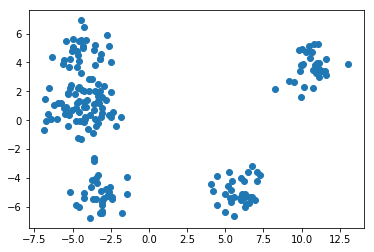

In [83]:
plt.scatter(PCA["Principal Component 1"], PCA["Principal Component 2"]);

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [58]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


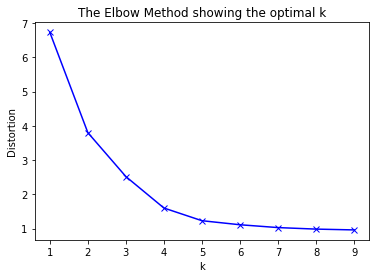

In [59]:
##### Your Code Here #####
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

x1 = points.x
x2 = points.y

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

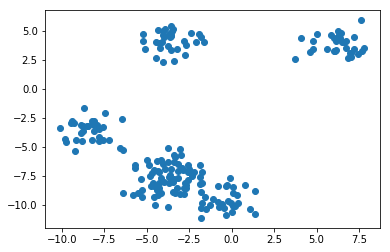

In [60]:
plt.scatter(points.x, points.y);

In [0]:
# Looking at elbow method and scatterplot, it looks like 4 or 5 clusters might work
# Let's go with k=4

In [61]:
centroids = points.sample(4)
centroids

,x,y
52,-8.198727,-3.055816
147,-4.326899,5.049896
128,-3.231208,3.402604
24,-2.685595,-8.512655


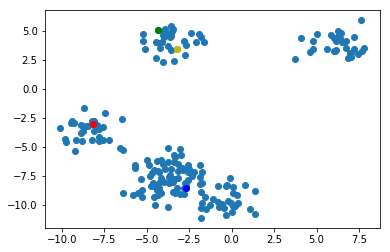

In [67]:
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0, 0], centroids.iloc[0, 1], "or");
ax.plot(centroids.iloc[1, 0], centroids.iloc[1, 1], "og");
ax.plot(centroids.iloc[2, 0], centroids.iloc[2, 1], "oy");
ax.plot(centroids.iloc[3, 0], centroids.iloc[3, 1], "ob");

In [73]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[3 1 1 3 1 1 3 3 0 1 1 1 1 1 3 1 3 1 1 2 3 2 2 2 1 1 1 0 1 1 1 1 1 2 1 1 1
 1 0 1 1 2 0 0 0 1 1 1 3 1 2 3 3 0 2 1 1 0 0 3 2 1 3 0 2 0 2 0 3 0 1 1 1 1
 2 2 1 1 0 2 0 1 1 1 0 1 0 1 1 2 0 1 2 1 1 1 1 1 1 1 1 1 3 1 1 2 3 3 3 2 1
 2 1 3 1 1 0 0 2 0 2 1 1 3 1 3 1 2 0 3 1 3 1 3 0 0 1 2 3 1 0 1 1 2 1 0 1 0
 3 1 1 1 3 2 1 0 1 2 1 3 1 1 0 3 2 2 1 0 1 1 3 1 0 2 1 1 1 1 1 3 1 1 1 1 1
 1 3 2 0 1 1 3 2 3 1 0 2 2 1 1]


In [74]:
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,1


In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 3:'blue'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', 
                 label=key, color=colors[key])
  plt.show()

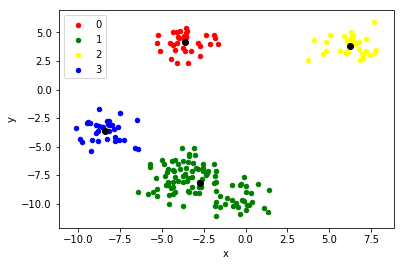

In [77]:
centroids = get_centroids(points, 'clusters')
plot_clusters(points, 'clusters', centroids)